<a href="https://colab.research.google.com/github/JuanRenza/Imagenes/blob/master/Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

%matplotlib inline
%cd /content/drive/My Drive/colab/Imagenes

def displayGray2(a, b, title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a, cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()


/content/drive/My Drive/colab/Imagenes


**Inversion de color**

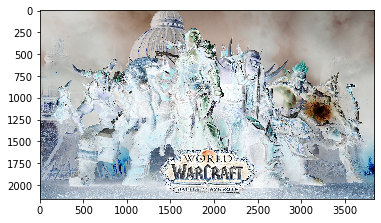

In [67]:
foto = Image.open('prueba4.jpg')
datos = list(foto.getdata())
datos_invertidos = [(255-datos[x][0], 255-datos[x][1], 255-datos[x][2]) for x in range (len(datos))]
imagen_invertida = Image.new('RGB', foto.size)
imagen_invertida.putdata(datos_invertidos)


plt.imshow(np.asarray(imagen_invertida))

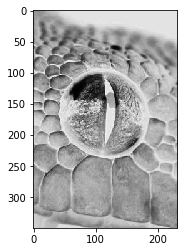

In [68]:
foto = Image.open('ojo2.jpg')
datos2 = foto.getdata()
datos_invertidos = [255 - x for x in datos2]
imagen_invertida = Image.new('L', foto.size)
imagen_invertida.putdata(datos_invertidos)

plt.imshow(np.asarray(imagen_invertida),cmap='gray')

**Transformacion logaritmica**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


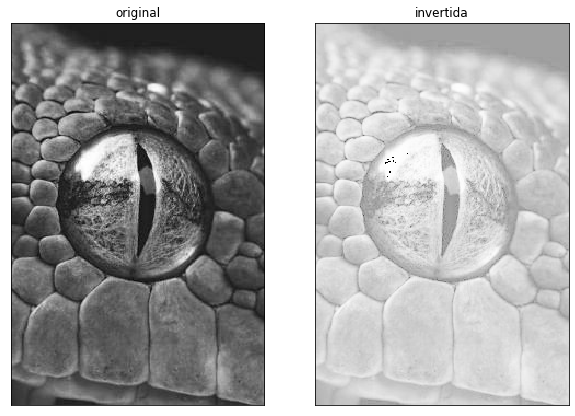

In [69]:
img = cv2.imread('ojo2.jpg')
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
img_log = np.array(img_log,dtype=np.uint8)
displayGray2(img,img_log,'original','invertida')

**Transformación Exponencial**

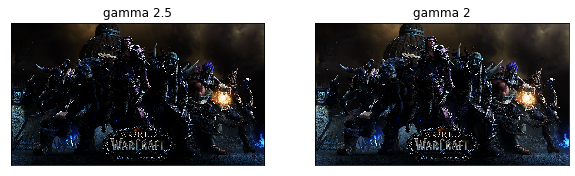

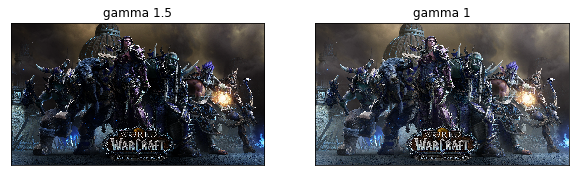

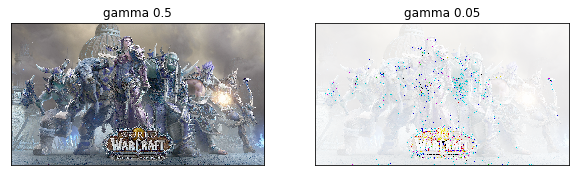

In [70]:
img = cv2.imread('prueba4.jpg')
gamma_2_P_5 = np.array(255*(img/255)**2.5,dtype='uint8')
gamma_2 = np.array(255*(img/255)**2,dtype='uint8')
gamma_1_P_5 = np.array(255*(img/255)**1.5,dtype='uint8')
gamma_1 = np.array(255*(img/255)**1,dtype='uint8')
gamma_0_P_5 = np.array(255*(img/255)**0.5,dtype='uint8')
gamma_0_P_05 = np.array(255*(img/255)**0.05,dtype='uint8')

displayGray2(gamma_2_P_5,gamma_2,'gamma 2.5','gamma 2')
displayGray2(gamma_1_P_5,gamma_1,'gamma 1.5','gamma 1')
displayGray2(gamma_0_P_5,gamma_0_P_05,'gamma 0.5','gamma 0.05')

**Binarizacion**


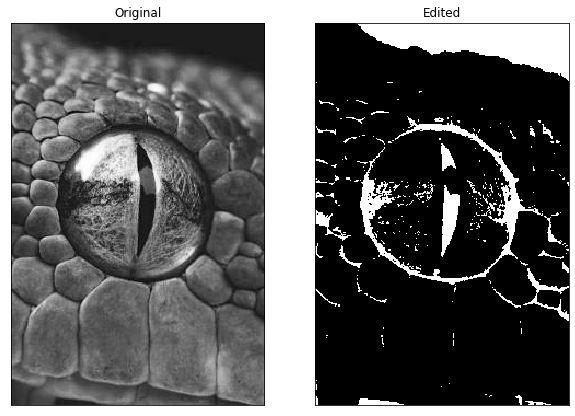

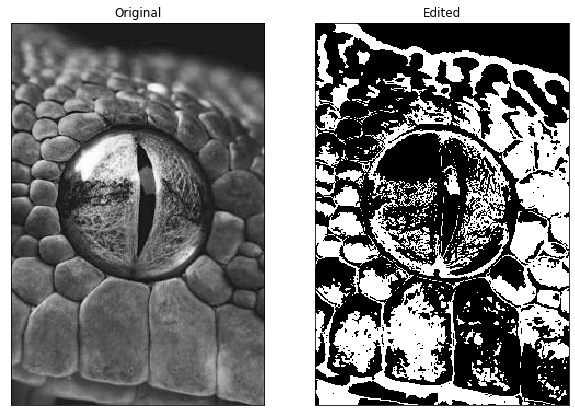

In [100]:
def binarizacion(img,minr=10,maxr=60):
  img = cv2.imread(img,0)
  #Traer alto y ancho de la imagen
  row, column = img.shape
  #Creo un arreglo vacio para guardar la imagen 
  img1=np.zeros((row,column), dtype = 'uint8')

  #especifico el rango minimo y maximo
  min_range = minr
  max_range = maxr

  #Itero en la imagen de entrada y si el valor del pixel esta en el rango lo transforma a 255
  for i in range(row):
    for j in range(column):
      if img[i,j]>min_range and img[i,j]<max_range:
        img1[i,j] = 255
      else:
        img1[i,j] = 0
  displayGray2(img,img1)
binarizacion('ojo2.jpg',0,50)
binarizacion('ojo2.jpg',50,100)


**Fraccionamiento**


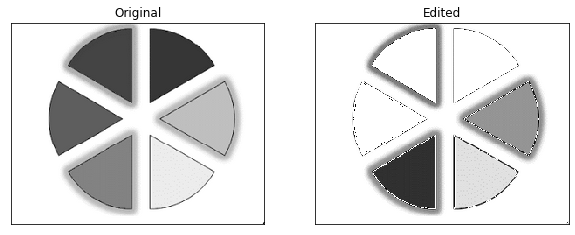

In [84]:
def Fracionamiento(img,minr=10,maxr=60):
  #Cargar imagen
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  #Traer alto y ancho de la imagen
  rows, columns = img.shape
  #Creo un arreglo vacio para guardar la imagen 
  img2=np.zeros((rows,columns), dtype = 'uint8')

  #intervalos
  a = minr
  b = maxr

  for x in range(0,rows):
    for y in range(0,columns):
      r = img[x][y]
      if a <=r and r<=b:
        img2[x][y] = 255
      else:
        img2[x][y] = img [x][y]
  displayGray2(img,img2)
  return
  
Fracionamiento('pastel.png',0,100)

**Threshold(Binarizacion por umbral)**

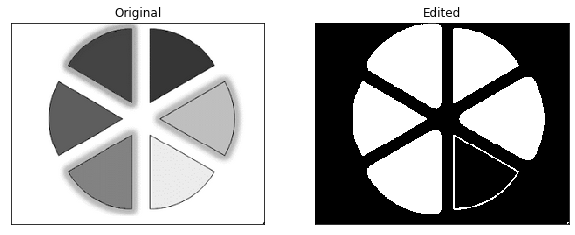

In [90]:
def Threshold(img,thres):
  #Cargar imagen
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  #Traer alto y ancho de la imagen
  rows, columns = img.shape
  #Creo un arreglo vacio para guardar la imagen 
  img2=np.zeros((rows,columns), dtype = 'uint8')

  #intervalos
  T = thres

  for x in range(0,rows):
    for y in range(0,columns):
      r = img[x][y]
      if T <=r:
        img2[x][y] = 0
      else:
        img2[x][y] = 255
  displayGray2(img,img2)
  return

Threshold('pastel.png',220)

**Transformacion por tramos**

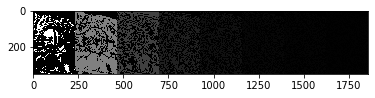

In [108]:
img = cv2.imread('ojo2.jpg',0)

#Itero sonre cada pixel y cambio el pixel a un valor binario usando np.bynary_repr() y lo guardo en una lista

lst = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lst.append(np.binary_repr(img[i][j], width=8)) #width es el numero de bits

#Tenemos una lista de Strings donde cada String representa un valor binario del pixel, para extraer los tramos de bits necesitamos iterar
#Multiplicar por 2^(n-1) y reconstruir la imagen del bit

eight_bit_img = (np.array([int(i[0]) for i in lst],dtype= np.uint8)*128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype= np.uint8)*64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype= np.uint8)*32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype= np.uint8)*16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype= np.uint8)*8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype= np.uint8)*4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype= np.uint8)*2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype= np.uint8)*1).reshape(img.shape[0],img.shape[1])

#Concateno las imagenes para mostrarlas mas facilmente usando cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img, seven_bit_img, six_bit_img, five_bit_img])
finalv = cv2.hconcat([four_bit_img, three_bit_img, two_bit_img, one_bit_img])

#Concatenamiento vertical 

final = cv2.hconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

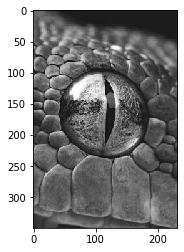

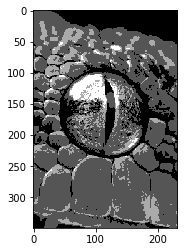

In [112]:
plt.imshow(img,cmap='gray')
plt.show()

new_img = eight_bit_img + seven_bit_img
plt.imshow(new_img, cmap='gray')